<a href="https://colab.research.google.com/github/JamesCFabrianes/Google-Collab-Python-/blob/main/B64_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # Data Manipulation
import numpy as np # Numerical/Math in Python
import matplotlib.pyplot as plt # Data Visualization

In [ ]:
df = pd.read_csv("/content/cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
import seaborn as sns
import plotly.express as px # Data Visualization

In [ ]:
df.shape # angka pertama adalah baris angka kedua adalah kolom

(569, 33)

In [ ]:
df.shape[0]

569

# Steps in Data Science :
1. Data Acquisition
2. Exploratory Data Analysis
3. Data Preprocessing / Cleaning
4. Modeling
5. Model Evaluation
6. Presentation

# 2. Exploratory Data Analysis

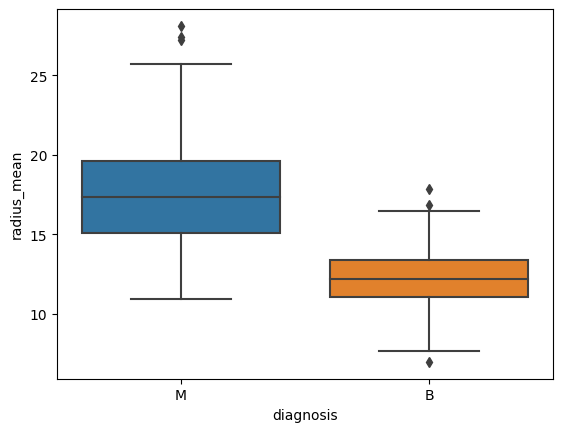

In [ ]:
ax = sns.boxplot(x = df["diagnosis"],
                 y = df["radius_mean"])

In [ ]:
fig = px.box(df,
             x = "diagnosis",
             y = "radius_mean",
             color = "diagnosis",
             points = "all")

fig.show()

In [ ]:
# sns scatterplot untuk x = texture_mean, y = perimeter_mean dengan hue adalah diagnosis

In [ ]:
fig = px.scatter(df,
                 x = "texture_mean",
                 y = "perimeter_mean",
                 color = "diagnosis")

fig.show()

In [ ]:
# sns displot dengan x = radius_mean, hue = "diagnosis", fill = True

In [ ]:
# import plotly.figure_factory as ff

# fig = ff.create_distplot(df["radius_mean"], ["Diagnosis"])

# fig.show()

PlotlyError: ignored

In [ ]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
df["diagnosis"].value_counts() / len(df) * 100

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

<Axes: xlabel='diagnosis', ylabel='Count'>

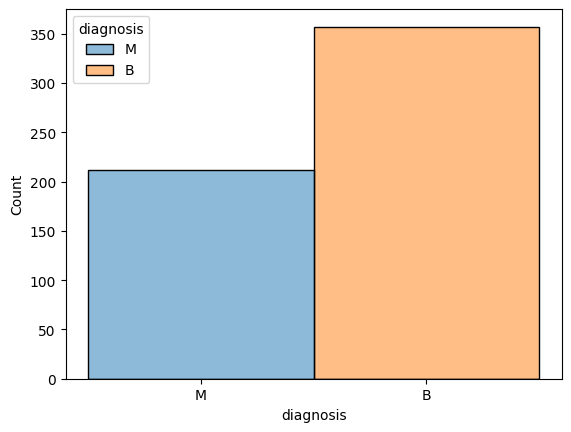

In [ ]:
sns.histplot(data = df,
             x = "diagnosis",
             hue = "diagnosis")

In [ ]:
fig = px.histogram(df, x = "diagnosis", color = "diagnosis")
fig.show()

# Kesimpulan :
1. untuk diagnosa M memiliki radius_mean lebih besar secara rata-rata dibandingkan dengan diagnosa B

2. Secara texture_mean dan perimeter_mean, diagnosa M nilainya lebih besar dibandingkan dengan diagnosa B

3. Dari data yang didapatkan terlihat bahwa jumlah kelas M lebih sedikit dibandingkan dengan kelas B, Kemungkinan berpotensi IMBALANCE DATASET

# Data Preprocessing

In [ ]:
# Feature Engineering ==> Memanipulasi feature yang bisa kita buang atau kita jadikan feature baru

# ID --> Buang saja karena ID itu hanya urutan data pada database
# Unnamed : 32 --> karena semua data kosong/hilang
# Kalau misalkan ada kolom data terus semua isinya sama itu bisa di buang karena tidak ada polanya

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
# Feature
X = df.drop(["id", "diagnosis", "Unnamed: 32"], axis = 1)

# Target
y = df["diagnosis"]

# Modeling

In [ ]:
# Anggap Machine Learning adalah seorang siswa yang akan ujian
# Sebelum ujian otomatis kita akan ajari siswanya

# train : 70% - 90%
# test : 30% - 10%

# Soal belajar untuk siswa -- X_train
# Soal ujian untuk siswa -- X_test

# Kunci Jawaban soal belajar untuk siswa -- y_train
# Kunci Jawaban soal ujian untuk siswa -- y_test

In [ ]:
from sklearn.model_selection import train_test_split # pisahin data train and test pada feature and target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model_logistic_regression = LogisticRegression()

model_logistic_regression.fit(X_train, y_train) # Training model dengan data

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_pred_logistic_regression = model_logistic_regression.predict(X_test)
y_pred_logistic_regression

array(['M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M'], dtype=object)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier()

model_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_decision_tree = model_decision_tree.predict(X_test)

# Support Vector Machine / SVM

In [ ]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_svm = model_svm.predict(X_test)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier()

model_random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_random_forest = model_random_forest.predict(X_test)

# Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Logistic Regression

cm_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)
print(cm_logistic_regression)

[[70  1]
 [ 2 41]]


In [ ]:
print(classification_report(y_test, y_pred_logistic_regression))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
print(classification_report(y_test, y_pred_decision_tree))

              precision    recall  f1-score   support

           B       0.94      0.96      0.95        71
           M       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
print(classification_report(y_test, y_pred_random_forest))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           B       0.89      0.99      0.93        71
           M       0.97      0.79      0.87        43

    accuracy                           0.91       114
   macro avg       0.93      0.89      0.90       114
weighted avg       0.92      0.91      0.91       114

